# Lead Case Study

## Step 1 : Reading & Understanding the Data 

#### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import dataset
leads_df = pd.read_csv("Leads.csv")

#### Inspecting the Data

In [3]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads_df.shape

(9240, 37)

In [5]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step 2 : Data Quality Checks

##### Duplicate Value Checks

In [7]:
# Checking for duplicates values
sum(leads_df.duplicated(subset = "Prospect ID"))==0

True

In [8]:
sum(leads_df.duplicated(subset = "Lead Number"))==0

True

No duplicate value found in Prospect ID & Lead Number. These columns are used to indicate the ID number of people contacted and are of no significance, so will drop these columns.

##### Null Value Checks

In [9]:
# Checking for NULL Values
leads_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# Checking percentage of NULL values in each column
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

## Step 3 : Exploratory Data Analysis (EDA)

### Data Cleaning

In [11]:
# Converting SELECT value to NA value
leads_df= leads_df.replace('Select', np.nan)

In [12]:
# Dropping 'Prospect ID' and 'Lead Number' columns
leads_df.drop(['Prospect ID','Lead Number'], 1, inplace = True)

In [13]:
# Dropping column more than 45% NULL Values
cols=leads_df.columns[round((leads_df.isnull().sum()/len(leads_df))*100)>=45]
leads_df=leads_df.drop(cols,1)

In [14]:
# Re-checking NULL value percentage in each column 
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

### Categorical Variable Analysis

#### 1. Analysing Country column

In [15]:
# Checking value counts of 'country' column
leads_df['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

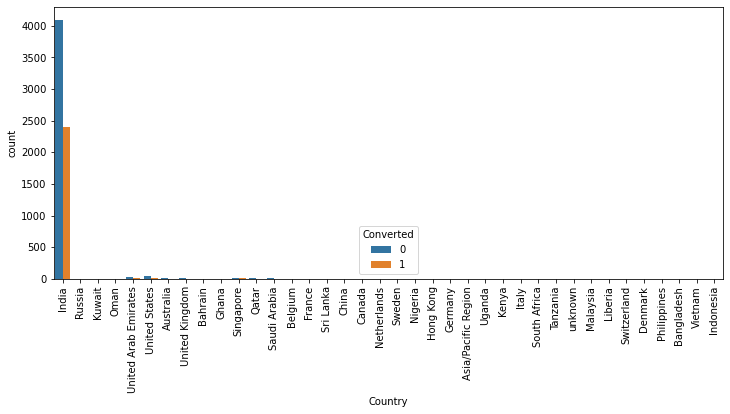

In [16]:
# Visualising the data spread in 'country' column
plt.figure(figsize=(12,5))
plt1=sns.countplot(leads_df.Country, hue=leads_df.Converted)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
plt.show()

Country 'India' is most recurring value, so we impute the missing values with 'India'

In [17]:
# Replacing missing data in country column with 'India'
leads_df['Country'] = leads_df['Country'].replace(np.nan, 'India')

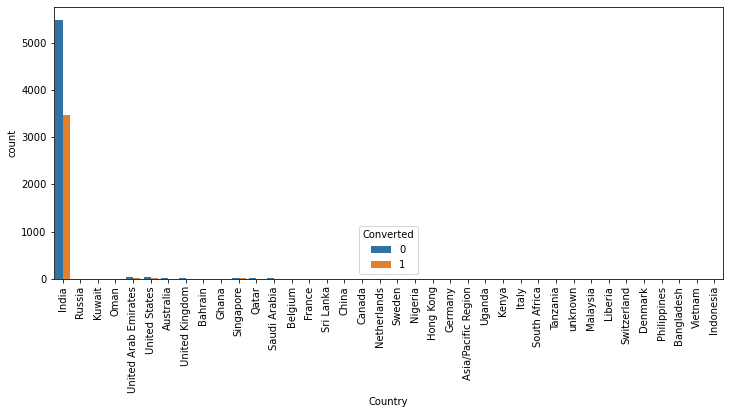

In [18]:
# Re-Checking the data spread in 'country' column after data imputation
plt.figure(figsize=(12,5))
plt1=sns.countplot(leads_df.Country, hue=leads_df.Converted)
plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
plt.show()

From above graph we can see that values of 'India' is quite high which indicates this data is highly skewed. It will influence the model incorrectly so we will drop this column.

#### 2. Analysing Specialization column

In [19]:
# Checking value counts of 'specialization' column
leads_df['Specialization'].value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

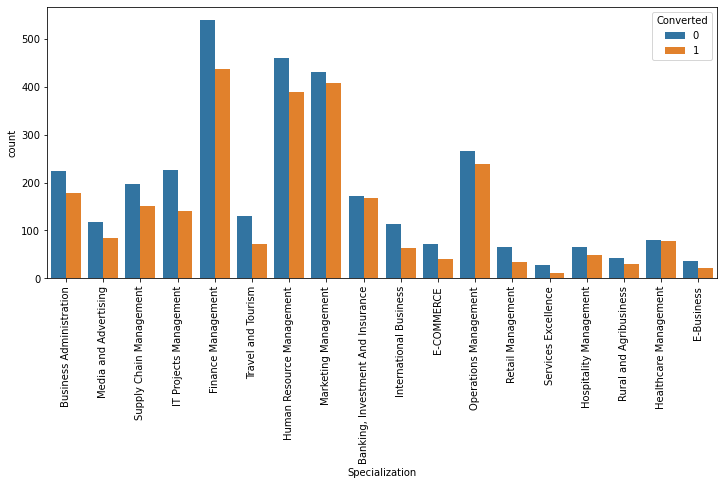

In [20]:
# Visualising data spread in 'specialization' column
plt.figure(figsize=(12,5))
plt3=sns.countplot(leads_df.Specialization, hue=leads_df.Converted)
plt3.set_xticklabels(plt3.get_xticklabels(),rotation=90)
plt.show()

From the above graph we can conclude that Leads may not have mentioned their specializations because
1. Chosen specialization is not in list.
2. They might still be students.

Hence we will replace NA values with the term 'Not Specified'

In [21]:
# Replacing missing data in 'specialization' column with 'not specified'
leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan, 'Not Specified')

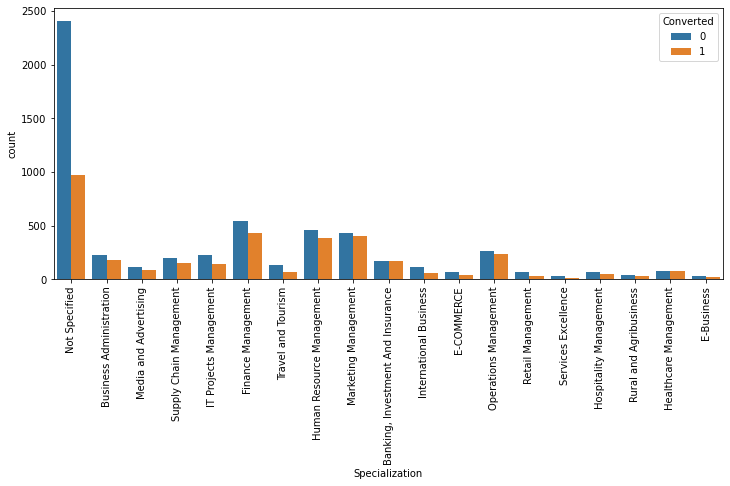

In [22]:
# Re-Checking the data spread in 'specialization' column after data correction
plt.figure(figsize=(12,5))
plt3=sns.countplot(leads_df.Specialization, hue=leads_df.Converted)
plt3.set_xticklabels(plt3.get_xticklabels(),rotation=90)
plt.show()

We can see that leads having different types of 'Management' specializations are more in number. Thus there is higher chance of management leads converting. So we will combine all the different 'management' specialization under 'Management Specialization'.

In [23]:
# Combining different management branches under one specialization
leads_df['Specialization'] = leads_df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations') 

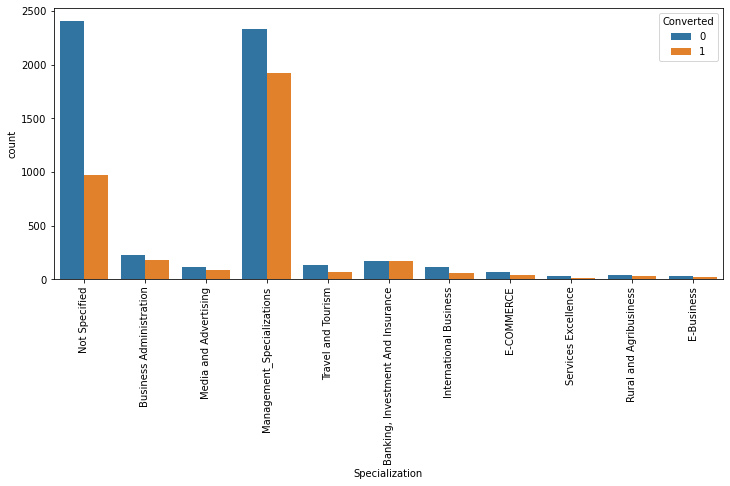

In [24]:
# Re-Checking the spread of data in 'specialization' column after data correction
plt.figure(figsize=(12,5))
plt3=sns.countplot(leads_df.Specialization, hue=leads_df.Converted)
plt3.set_xticklabels(plt3.get_xticklabels(),rotation=90)
plt.show()

#### 3. Analysing City column

In [25]:
# Checking value counts of 'city' column
leads_df['City'].value_counts(dropna = False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

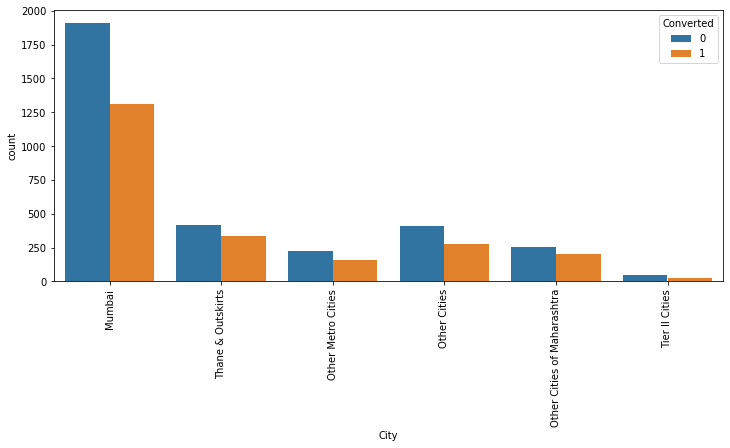

In [26]:
# Visualising data spread in 'city' column
plt.figure(figsize=(12,5))
plt2=sns.countplot(leads_df.City, hue=leads_df.Converted)
plt2.set_xticklabels(plt2.get_xticklabels(),rotation=90)
plt.show()

'Mumbai' is most recurring value, so we impute the missing values with 'Mumbai'

In [27]:
# replacing 'city' column missing data with ie 'Mumbai'
leads_df['City'] = leads_df['City'].replace(np.nan, 'Mumbai')

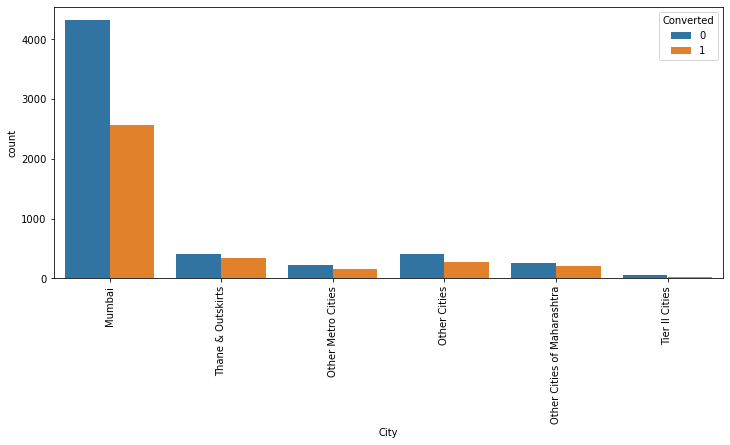

In [28]:
# Re-Checking data in 'city' column after data imputation
plt.figure(figsize=(12,5))
plt2=sns.countplot(leads_df.City, hue=leads_df.Converted)
plt2.set_xticklabels(plt2.get_xticklabels(),rotation=90)
plt.show()

The data of this column is not highly skewed and hence we will retain this column.

#### 4. Analysing 'What matters most to you in choosing a course' column

In [29]:
# Checking value counts of 'What matters most to you in choosing a course' column
leads_df['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [30]:
# Replacing 'What matters most to you in choosing a course' column missing data with most reccuring value 'Better Career Prospects'
leads_df['What matters most to you in choosing a course'] = leads_df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

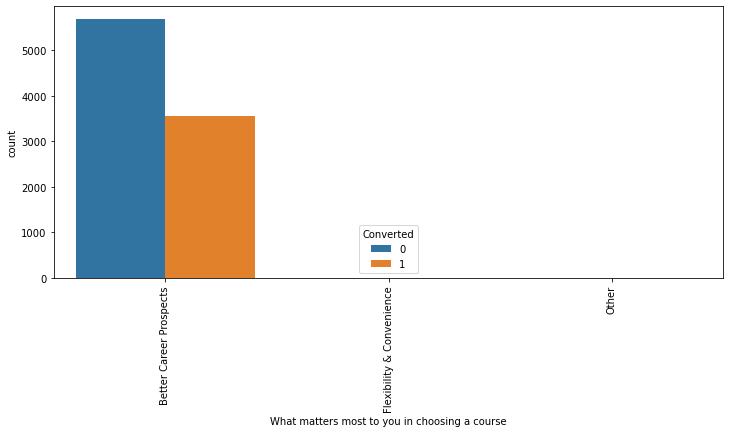

In [31]:
# Visualising the data in 'What matters most to you in choosing a course' column after data imputation
plt.figure(figsize=(12,5))
plt5=sns.countplot(leads_df['What matters most to you in choosing a course'], hue=leads_df.Converted)
plt5.set_xticklabels(plt5.get_xticklabels(),rotation=90)
plt.show()

Data is skewed towards 'Better Career Prospect' and hence this column will be dropped.

#### 5. Analysing 'What is your current occupation' column

In [32]:
# Checking value counts of 'What is your current occupation' column
leads_df['What is your current occupation'].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

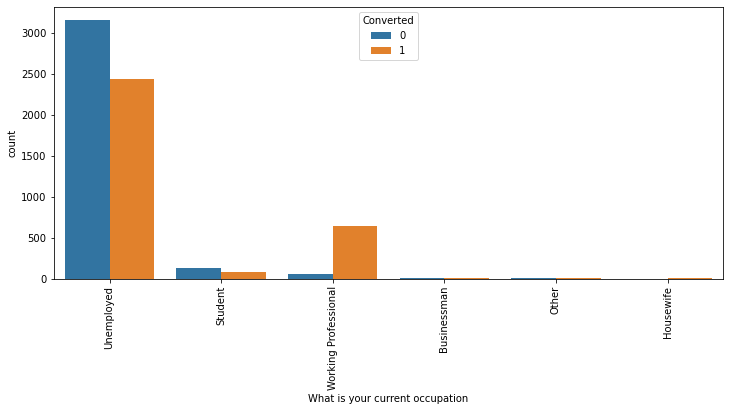

In [33]:
# Visualising data spread in 'What is your current occupation' column
plt.figure(figsize=(12,5))
plt4=sns.countplot(leads_df['What is your current occupation'], hue=leads_df.Converted)
plt4.set_xticklabels(plt4.get_xticklabels(),rotation=90)
plt.show()

In [34]:
# Replacing 'What is your current occupation' column missing data with most reccuring value ie 'Unemployed'
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Unemployed')

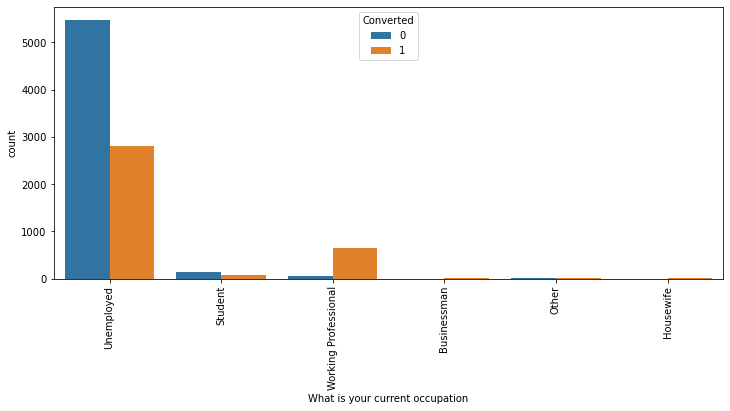

In [35]:
# Re-Checking data spread in 'What is your current occupation' column after data imputation
plt.figure(figsize=(12,5))
plt4=sns.countplot(leads_df['What is your current occupation'], hue=leads_df.Converted)
plt4.set_xticklabels(plt4.get_xticklabels(),rotation=90)
plt.show()

The data look skewed in favor of 'Unemployed' leads but we found a trend: leads who are 'working professionals' are more likely to get converted. Hence we will retain this column.

#### 6.  Analysing Tags column

In [36]:
# Checking value counts of 'tags' column
leads_df.Tags.value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [37]:
# Replace 'tags' column missing data with 'not specified'
leads_df['Tags'] = leads_df['Tags'].replace(np.nan, 'Not Specified')

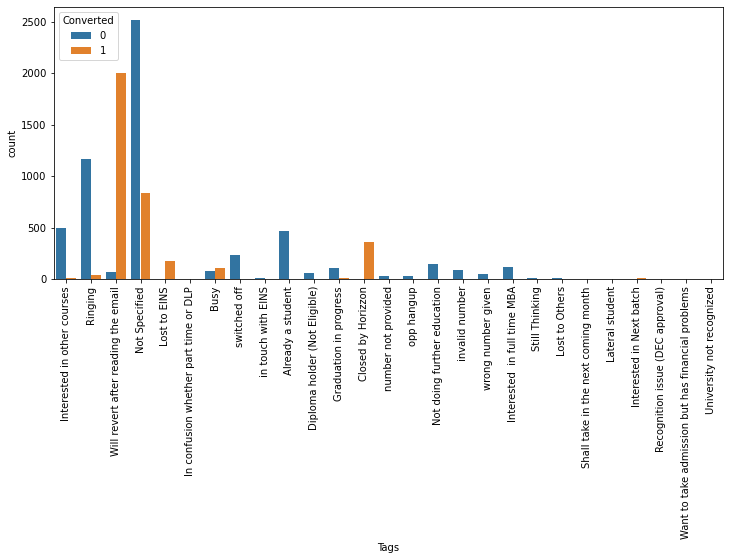

In [38]:
# Visualising the spread of data in 'tags' column
plt.figure(figsize=(12,5))
plt6=sns.countplot(leads_df['Tags'], hue=leads_df.Converted)
plt6.set_xticklabels(plt6.get_xticklabels(),rotation=90)
plt.show()

Leads that are tagged 'Will revert after reading mail' have highest chances of being converted followed by 'Lost To EINS', 'Closed By Horizon and 'Busy'. Also there is a lot of data with very low frequence, so for better understanding we will merge them into 'Other_Tags'.

In [39]:
# Replace 'tags' column low frequency data with term 'Other_Tags'
leads_df['Tags'] = leads_df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

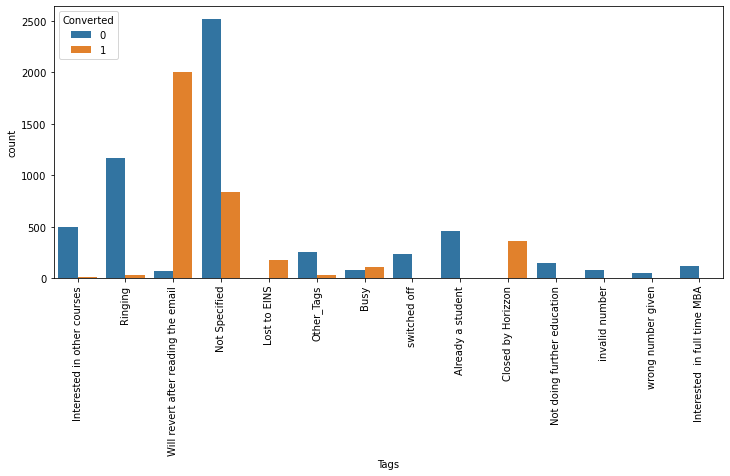

In [40]:
# Visualising the spread of data in 'tags' column after merging columns
plt.figure(figsize=(12,5))
plt6=sns.countplot(leads_df['Tags'], hue=leads_df.Converted)
plt6.set_xticklabels(plt6.get_xticklabels(),rotation=90)
plt.show()

There are still a few more of the data points can be merged under Other_Tags column which are showing low frequency to improve the visualization spread.

In [41]:
# Replace 'tags' column low frequency data with term 'Other_Tags'
leads_df['Tags'] = leads_df['Tags'].replace(['switched off',
                                      'Already a student',
                                      'Not doing further education',
                                      'invalid number',
                                      'wrong number given',
                                      'Interested  in full time MBA'] , 'Other_Tags')

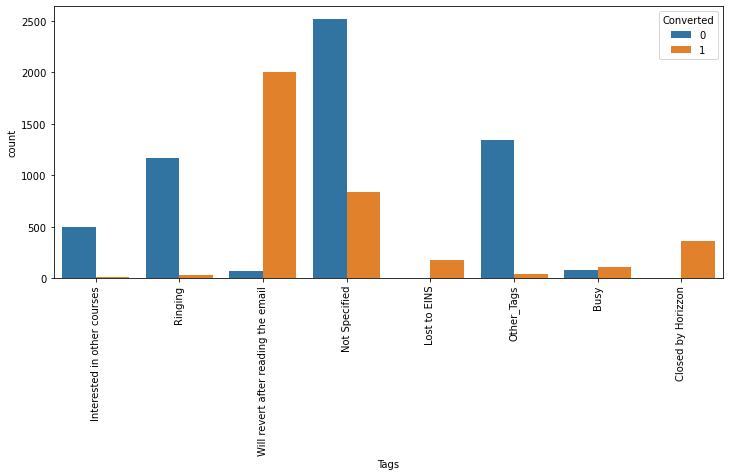

In [42]:
# Visualising the spread of data in 'tags' column after data merging
plt.figure(figsize=(12,5))
plt6=sns.countplot(leads_df['Tags'], hue=leads_df.Converted)
plt6.set_xticklabels(plt6.get_xticklabels(),rotation=90)
plt.show()

Leads tagged 'Will revert after reading mail' have highest chances of being converted followed by 'Lost To EINS', 'Closed By Horizon and 'Busy' and efforts should be made to generate more leads from these tags.

'Ringing' and 'Not Specified' tagged leads are more in number and hence efforts should be made to maximize conversion from these tags.

#### 7. Analysing Last Activity column

In [43]:
# Checking value counts of 'Last Activity' column
leads_df['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

There are lots of the data points with very low frequency which we can merge together with term 'Other_Tags' along with the missing values as well as they are low in number.

In [44]:
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Unreachable',
                                      'Unsubscribed',
                                      'Had a Phone Conversation',
                                      'Approached upfront',
                                      'View in browser link Clicked',
                                      'Email Received', 'Email Marked Spam', 'Visited Booth in Tradeshow', 
                                      'Resubscribed to emails'] , 'Other_Tags')
leads_df['Last Activity'] = leads_df['Last Activity'].replace(np.nan, 'Other_Tags')

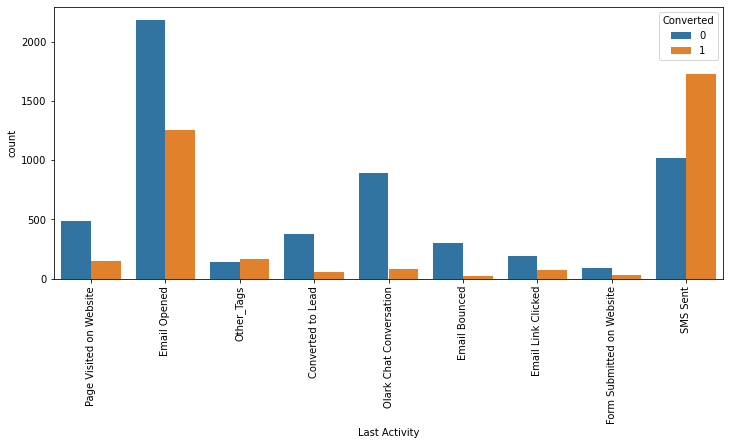

In [45]:
# Visualising data spread in 'Last Activity' column after data imputation
plt.figure(figsize=(12,5))
plt8=sns.countplot(leads_df['Last Activity'], hue=leads_df.Converted)
plt8.set_xticklabels(plt8.get_xticklabels(),rotation=90)
plt.show()

From above we can see that for leads having last activity as 'SMS Sent' have the most conversion rate.

'Email Opened' brings maximum no.of leads and has second most conversion as well.

#### 8. Analysing Lead Source column

In [46]:
# Checking all value counts of 'Lead Source' column
leads_df['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

We see a lot of the data points with very low frequency which we can merge together with one term 'Others' along with the missing values as well as they are low in number.

Datapoints like 'google' and 'Google' which are same and 'Facebook' and 'Social Media' which are similar are merged together.

In [47]:
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['bing',
                                    'Click2call',
                                    'Press_Release',
                                    'Live Chat',
                                    'youtubechannel',
                                    'testone', 
                                    'Pay per Click Ads',
                                    'welearnblog_Home',
                                    'WeLearn',
                                    'blog',
                                    'NC_EDM'] , 'Others')
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['google'], 'Google')
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['Facebook'], 'Social Media')
leads_df['Lead Source'] = leads_df['Lead Source'].replace(np.nan, 'Others')

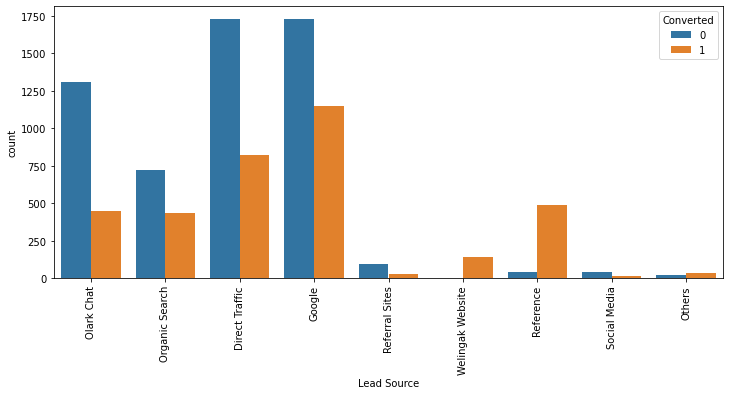

In [48]:
# Checking data spread in 'Lead Source' column after data imputation
plt.figure(figsize=(12,5))
plt7=sns.countplot(leads_df['Lead Source'], hue=leads_df.Converted)
plt7.set_xticklabels(plt7.get_xticklabels(),rotation=90)
plt.show()

'Google' and 'Direct Traffic' generate number amount of leads and lead conversions while some like 'Welingak Website', 'Reference' and 'Others' are having maximum conversion of leads. This is a very significant column hence we shall retain it.

To improve overall lead conversion rate, focus should be on improving lead conversion of 'direct traffic' and 'google leads' and efforts should be put to generate more leads from 'reference' and 'welingak website' as they are conversion rate is very strong.

#### 9. Analysing 'Lead Origin' column

In [49]:
# Checking value counts of 'Lead Origin' column
leads_df['Lead Origin'].value_counts(dropna = False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

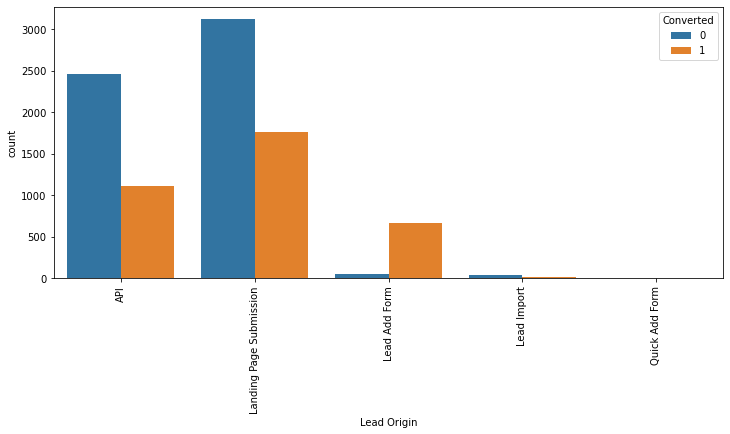

In [50]:
# Visualising data spread in 'Lead Origin' column
plt.figure(figsize=(12,5))
plt9=sns.countplot(leads_df['Lead Origin'], hue=leads_df.Converted)
plt9.set_xticklabels(plt9.get_xticklabels(),rotation=90)
plt.show()

- This is very significant column as we can see that 'Lead Add Form' is a very good origin of leads due to its very strong conversion rate.
- Lead Import and Quick Add Form get very few leads.
- 'Landing Page Submissions' and 'API' bring a higher amount of leads and see more lead conversion as well.
- To improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

#### 10.  Analysing 'Do Not Email' column

In [51]:
# Checking value counts of 'Do Not Email' column
leads_df['Do Not Email'].value_counts(dropna = False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

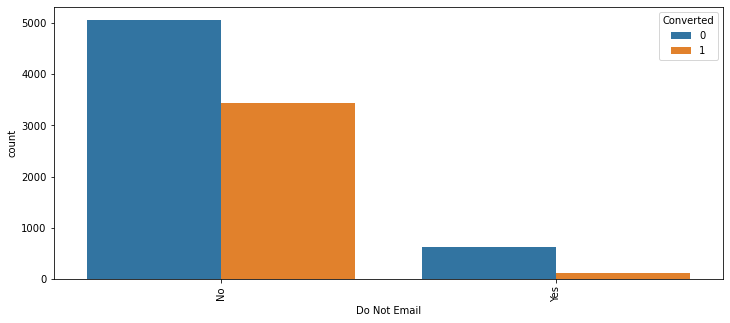

In [52]:
# Visualising the spread of data in 'Do Not Email' column
plt.figure(figsize=(12,5))
plt10=sns.countplot(leads_df['Do Not Email'], hue=leads_df.Converted)
plt10.set_xticklabels(plt10.get_xticklabels(),rotation=90)
plt.show()

#### 11. Analysing 'Do Not Call' column

In [53]:
# Checking value counts of 'Do Not Call' column
leads_df['Do Not Call'].value_counts(dropna = False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

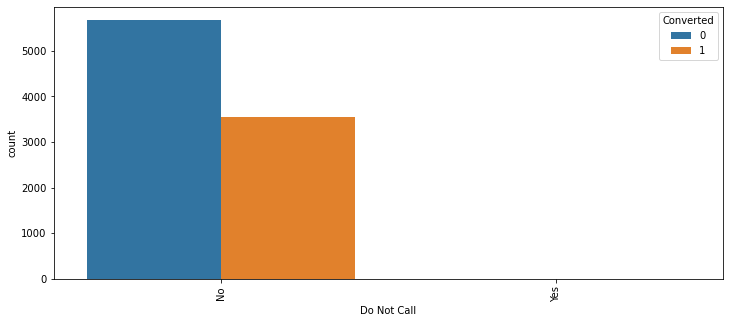

In [54]:
# Visualising data spread in 'Do Not Call' column
plt.figure(figsize=(12,5))
plt11=sns.countplot(leads_df['Do Not Call'], hue=leads_df.Converted)
plt11.set_xticklabels(plt11.get_xticklabels(),rotation=90)
plt.show()

We will retain 'Do Not Mail' column due to its better spread of data but 'Do Not Call' column will be dropped at the end of this analysis due to highly skewed data spread.

#### 12. Analysing 'Last Notable Activity' column

In [55]:
# Checking value counts of 'Last Notable Activity' column 
leads_df['Last Notable Activity'].value_counts(dropna = False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

We see a lot of the data points with very low frequency which we can merge together under one single term 'Others' .

In [56]:
leads_df['Last Notable Activity'] = leads_df['Last Notable Activity'].replace(['Email Bounced',
                                      'Unsubscribed',
                                      'Unreachable',
                                      'Had a Phone Conversation',
                                      'Email Marked Spam',
                                      'Approached upfront',
                                      'Resubscribed to emails',
                                      'View in browser link Clicked', 
                                      'View in browser link Clicked',
                                      'Form Submitted on Website', 'Email Received'] , 'Others')

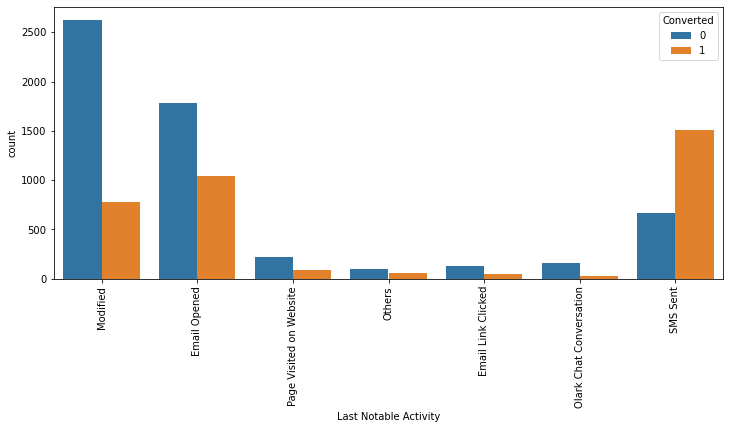

In [57]:
# Checking data spread in 'Last Notable Activity' column after data imputation
plt.figure(figsize=(12,5))
plt13=sns.countplot(leads_df['Last Notable Activity'], hue=leads_df.Converted)
plt13.set_xticklabels(plt13.get_xticklabels(),rotation=90)
plt.show()

This is significant column which should be retained as we can clearly see that for leads having last notable activity as 'SMS Sent' have a very high conversion rate.

#### 13. Analysing 'A free copy of Mastering The Interview' Column

In [58]:
# Checking value counts of 'A free copy of Mastering The Interview' column
leads_df['A free copy of Mastering The Interview'].value_counts(dropna = False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

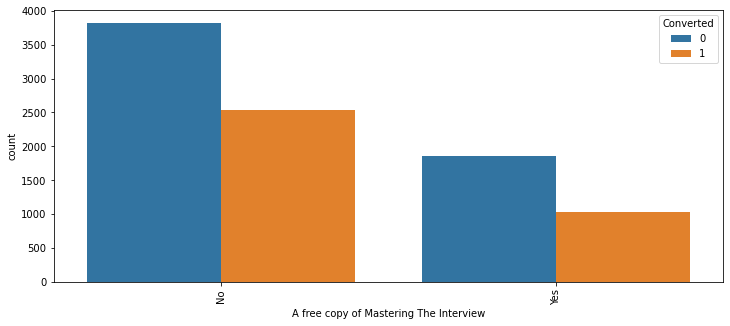

In [59]:
# Visualising data spread in 'A free copy of Mastering The Interview' column
plt.figure(figsize=(12,5))
plt12=sns.countplot(leads_df['A free copy of Mastering The Interview'], hue=leads_df.Converted)
plt12.set_xticklabels(plt12.get_xticklabels(),rotation=90)
plt.show()

Data is not highly skewed in this column.

#### 14. Analysing The Remaining Categorical Columns

In [60]:
# Checking value counts of 'Search' column
leads_df['Search'].value_counts(dropna = False)

No     9226
Yes      14
Name: Search, dtype: int64

In [61]:
# Checking value counts of 'Magazine' column
leads_df['Magazine'].value_counts(dropna = False)

No    9240
Name: Magazine, dtype: int64

In [62]:
# Checking value counts of 'Newspaper Article' column
leads_df['Newspaper Article'].value_counts(dropna = False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [63]:
# Checking value counts of 'X Education Forums' column
leads_df['X Education Forums'].value_counts(dropna = False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [64]:
# Checking value counts of 'Newspaper' column
leads_df['Newspaper'].value_counts(dropna = False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [65]:
#checking all value counts of 'Digital Advertisement' column

leads_df['Digital Advertisement'].value_counts(dropna = False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [66]:
# Checking value counts of 'Receive More Updates About Our Courses' column
leads_df['Receive More Updates About Our Courses'].value_counts(dropna = False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [67]:
# Checking value counts of 'Update me on Supply Chain Content' column
leads_df['Update me on Supply Chain Content'].value_counts(dropna = False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [68]:
# Checking value counts of 'Get updates on DM Content' column
leads_df['Get updates on DM Content'].value_counts(dropna = False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [69]:
# Checking value counts of 'I agree to pay the amount through cheque' column
leads_df['I agree to pay the amount through cheque'].value_counts(dropna = False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

As we can see that above columns have highly skewed data and hence it will be better to drop these columns from our analysis.

In [70]:
# Checking percentage of missing values in dataset after data imputation
round(100*(leads_df.isnull().sum())/len(leads_df.index), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

As we can see that only 2 columns have about 1.5% missing values each which are highly insignificant and hence can be dropped altogether.

In [71]:
leads_df = leads_df.dropna()

In [72]:
# Re-Checking the percentage of missing values
round(100*(leads_df.isnull().sum())/len(leads_df.index), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

As seen from above our dataset has no missing values now.

In [73]:
# Dropping the highly skewed data columns
cols_dropped = ['Country', 
                'What matters most to you in choosing a course', 
                'Search', 'Magazine', 
                'Newspaper Article', 
                'X Education Forums', 
                'Newspaper', 
                'Digital Advertisement', 
                'Through Recommendations',
                'Receive More Updates About Our Courses', 
                'Update me on Supply Chain Content', 
                'Get updates on DM Content',
                'I agree to pay the amount through cheque', 
                'Do Not Call']

In [74]:
leads_df = leads_df.drop(cols_dropped, 1)

In [75]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

### Numerical Variables Analysis

#### 1. Analysing 'Converted' column

In [76]:
# Checking the leads who were converted.
converted = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100

In [77]:
converted

38.02043282434362

##### Analysing the correlation of numerical variable using heatmap.

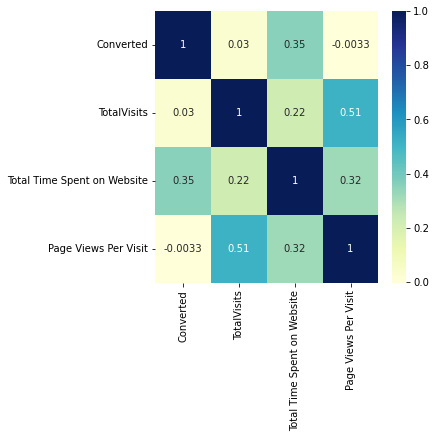

In [78]:
# Visualizing correlation of numerical variable using heatmap.
plt.figure(figsize = (5,5))
sns.heatmap(leads_df.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

From above correlation we can see that 'Total Visits' and 'Page Views Per Visit' have the most correlation with each other. We will keep this in mind while building our model.

#### 2. Analysing 'Total Visits' columns.

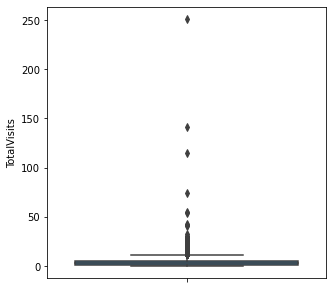

In [79]:
# Visualising spread of 'total visits' column
plt.figure(figsize=(5,5))
sns.boxplot(y=leads_df['TotalVisits'])
plt.show()

#### 3. Analysing 'Page Views Per Visit' columns.

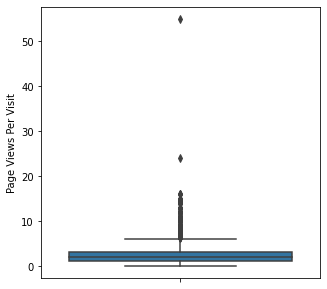

In [80]:
# Visualising spread of 'Page Views Per Visit' column
plt.figure(figsize=(5,5))
sns.boxplot(y=leads_df['Page Views Per Visit'])
plt.show()

#### 4. Analysing 'Total Time Spent on Website' columns.

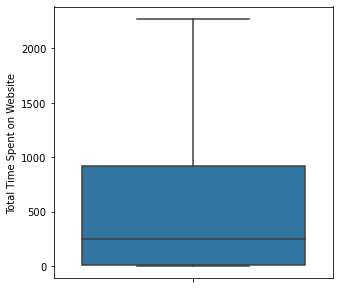

In [81]:
# Visualising spread of 'Total Time Spent on Website' column
plt.figure(figsize=(5,5))
sns.boxplot(y=leads_df['Total Time Spent on Website'])
plt.show()

- The boxplot of 'Total Time Spent on Website' has no outliers.
- The boxplot of 'Page Views Per Visit' and 'Total Visits' have outliers.

In [82]:
# Checking the percentiles of 'Page Views Per Visit' column
leads_df['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [83]:
# checking the percentiles of 'TotalVisits' column
leads_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

As we can see, the difference between 99th percentile and max value and min value and 25th percentile is very high for both the columns. So we will drop the top and bottom 1% of datapoints to treat these outliers.

In [84]:
# Dropping the top and bottom 1% datapoints to treat outliers
Q_3 = leads_df.TotalVisits.quantile(0.99)
leads_df = leads_df[(leads_df.TotalVisits <= Q_3)]
Q_1 = leads_df.TotalVisits.quantile(0.01)
leads_df = leads_df[(leads_df.TotalVisits >= Q_1)]

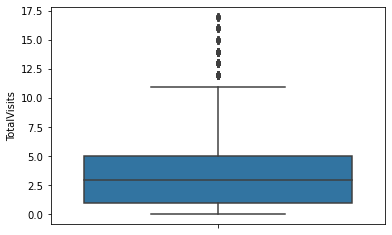

In [85]:
# Visualizing the spread of 'TotalVisits' column
sns.boxplot(y=leads_df['TotalVisits'])
plt.show()

In [86]:
# Dropping the top and bottom 1% datapoints to treat outliers 
Q_3 = leads_df['Page Views Per Visit'].quantile(0.99)
leads_df = leads_df[(leads_df['Page Views Per Visit'] <= Q_3)]
Q_1 = leads_df['Page Views Per Visit'].quantile(0.01)
leads_df = leads_df[(leads_df['Page Views Per Visit'] >= Q_1)]

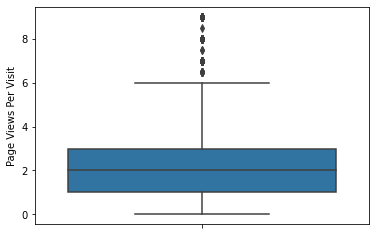

In [87]:
# Visualizing the spread of 'Page Views Per Visit' column
sns.boxplot(y=leads_df['Page Views Per Visit'])
plt.show()

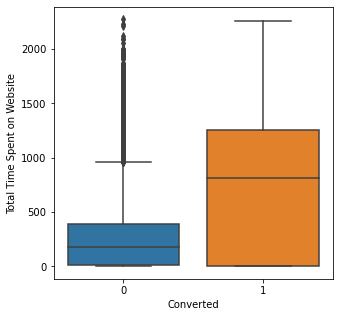

In [88]:
# Visualising the spread of Converted vs Total Time Spent on Website
plt.figure(figsize=(5,5))
sns.boxplot(y=leads_df['Total Time Spent on Website'], x=leads_df['Converted'])
plt.show()

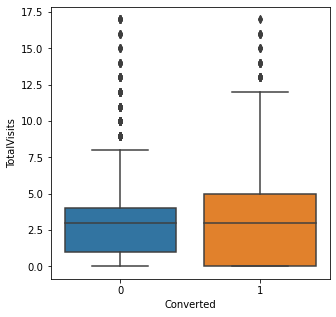

In [89]:
# Visualising the spread of Converted vs Total Visits
plt.figure(figsize=(5,5))
sns.boxplot(y=leads_df['TotalVisits'], x=leads_df['Converted'])
plt.show()

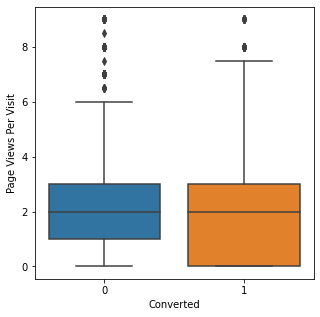

In [90]:
# Visualising the spread of Converted vs Page Views Per Visit
plt.figure(figsize=(5,5))
sns.boxplot(y=leads_df['Page Views Per Visit'], x=leads_df['Converted'])
plt.show()

1. From the above graphs we can see that the median is high for the Total Time Spent on Website vs Converted column. Hence we conclude that leads which spend more time on website have higher chances of getting converted.

2. There is no conclusive evidence for other as the medians are same.

## Step 4 : Creating Dummy Variables

#### 1. Identifying Columns Having Categorical Variable

In [91]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8953 non-null   object 
 1   Lead Source                             8953 non-null   object 
 2   Do Not Email                            8953 non-null   object 
 3   Converted                               8953 non-null   int64  
 4   TotalVisits                             8953 non-null   float64
 5   Total Time Spent on Website             8953 non-null   int64  
 6   Page Views Per Visit                    8953 non-null   float64
 7   Last Activity                           8953 non-null   object 
 8   Specialization                          8953 non-null   object 
 9   What is your current occupation         8953 non-null   object 
 10  Tags                                    8953 non-null   obje

In [92]:
# Extract columns having "object" datatype
cat_cols= leads_df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### 2. Mapping the binary response categorical columns with only 2 responses

In [93]:
# Variables list for map
var_map = ['Do Not Email', 'A free copy of Mastering The Interview']

In [94]:
# Defining mapping function
def map_binary(x):
    return x.map({'Yes':1, 'No':0})

In [95]:
# Apply map function to variable list
leads_df[var_map] = leads_df[var_map].apply(map_binary)

In [96]:
# Checking the mapping of binary values
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Other_Tags,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified


#### 3. Creating Dummy Variables For Categorical Variables
We will do following tasks :-

- Create the Dummy Variables
- Drop Original Columns for Which Dummy Variables are Created
- Drop first Columns ss 'p-1' Dummies will explain for 'p' Categories 

In [97]:
# Creating Dummy variables and dropping first columns
dummy_var_1 = pd.get_dummies(leads_df[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

# Concatenating results to the main dataframe i.e. leads_df
leads_df = pd.concat([leads_df,dummy_var_1],1)

In [98]:
# Creating Dummy variables and Dropping first columns
dummy_var_2 = pd.get_dummies(leads_df['Specialization'], prefix  = 'Specialization')
dummy_var_2 = dummy_var_2.drop(['Specialization_Not Specified'], 1)

# Concatenating results to the main dataframe i.e. leads_df
leads_df = pd.concat([leads_df, dummy_var_2], axis = 1)

In [99]:
# Creating Dummy variables and Dropping first columns
dummy_var_3 = pd.get_dummies(leads_df['Lead Source'], prefix  = 'Lead Source')
dummy_var_3 = dummy_var_3.drop(['Lead Source_Others'], 1)

# Concatenating results to the main dataframe i.e. leads_df
leads_df = pd.concat([leads_df, dummy_var_3], axis = 1)

In [100]:
# Creating Dummy variables and Dropping first columns
dummy_var_4 = pd.get_dummies(leads_df['Last Activity'], prefix  = 'Last Activity')
dummy_var_4 = dummy_var_4.drop(['Last Activity_Other_Tags'], 1)

# Concatenating results to the main dataframe i.e. leads_df
leads_df = pd.concat([leads_df, dummy_var_4], axis = 1)

In [101]:
# Creating Dummy variables and Dropping first columns
dummy_var_5 = pd.get_dummies(leads_df['Tags'], prefix  = 'Tags')
dummy_var_5 = dummy_var_5.drop(['Tags_Other_Tags'], 1)

# Concatenating results to the main dataframe i.e. leads_df
leads_df = pd.concat([leads_df, dummy_var_5], axis = 1)

In [102]:
# Createing Dummy variables and Dropping first columns
dummy_var_6 = pd.get_dummies(leads_df['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy_var_6 = dummy_var_6.drop(['Last Notable Activity_Others'], 1)

# Concatenating results to the main dataframe i.e. leads_df
leads_df = pd.concat([leads_df, dummy_var_6], axis = 1)

In [103]:
# Dropping Original Columns for which Dummies are made
leads_df.drop(cat_cols, 1, inplace = True)

In [104]:
# Checking Dummy variables mappings
leads_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Tags_Lost to EINS,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


## Step 5 : Logistic Regression Model Building

#### 1. Splitting The Dataset
- We will now first split the dataset into train and test datasets in ratio of 70-30.

In [105]:
from sklearn.model_selection import train_test_split

# Assig response variable to y
y = leads_df['Converted']

# Assigning remaining variables to X
X = leads_df.drop('Converted', axis=1)

In [106]:
# Check X dataframe
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Tags_Lost to EINS,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0


In [107]:
# Check y dataframe
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [108]:
# Splitting the data into train & test data with 70% train and 30% test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [109]:
# Check the shape of X_train dataset
X_train.shape

(6267, 55)

In [110]:
# Check shape of y_train dataset
y_train.shape

(6267,)

#### 2. Rescaling Numerical Variables

In [111]:
# Import required libraries
from sklearn.preprocessing import StandardScaler

In [112]:
# Apply scaler to all numeric variables
scaler = StandardScaler()

In [113]:
# Extracting numeric columns
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

In [114]:
# Fitting & Training the dataset to rescale the numeric variables
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [115]:
# Checking scaled values of numeric columns
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Tags_Lost to EINS,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


#### 3. Model Building using Statsmodels and RFE

We will do the followig steps :-

- We will start building the model manually starting with the 15 best variables as selected by RFE.
- We will check which model is a better fit by dropping variables that are not required depending upon their VIF values/p-values.
- We will drop variables either having VIF > 5 or having p-values > 0.05.
- VIF parameter(i.e. multicollinearity) must be < 5 while p-values that will determine significance of the variables must be < 0.05. 
- We will use the statsmodels to view a detailed summary of different parameters and make decisions.
- We will keep dropping/adding variables to find the best model and then test it against the test dataset.

In [116]:
# Import the required libraries
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [117]:
# Initialize logarithmic regression function
logreg = LogisticRegression()

In [118]:
# Running RFE with 15 variables as output
rfe = RFE(estimator=logreg, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [119]:
# Display the variables chosen by RFE for builing the initial model & ranking of rejected variables.
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 26),
 ('Total Time Spent on Website', False, 2),
 ('Page Views Per Visit', False, 24),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 19),
 ('What is your current occupation_Housewife', False, 27),
 ('What is your current occupation_Other', False, 29),
 ('What is your current occupation_Student', False, 20),
 ('What is your current occupation_Unemployed', False, 21),
 ('What is your current occupation_Working Professional', False, 7),
 ('City_Other Cities', False, 23),
 ('City_Other Cities of Maharashtra', False, 34),
 ('City_Other Metro Cities', False, 39),
 ('City_Thane & Outskirts', False, 37),
 ('City_Tier II Cities', False, 31),
 ('Specialization_Banking, Investment And Insurance', False, 14),
 ('Specialization_Business Administration', False, 41),
 ('Specialization_E-Business', False, 32),
 ('Specialization_E-COMMERCE', False, 22),
 ('Specialization_International Business', F

In [120]:
# Variables rejected by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_T

In [121]:
# Extract & Assign the RFE columns to a variable.
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Not Specified', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

#### 1. Building the Model-1

In [122]:
#import the VIF object
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [123]:
# Create a dataframe with all predictor variables along with their VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Source_Welingak Website,1.35
9,Tags_Closed by Horizzon,1.22
8,Tags_Busy,1.09
6,Last Activity_Email Bounced,1.07
10,Tags_Lost to EINS,1.05
4,Lead Source_Referral Sites,1.02
0,Lead Origin_Lead Add Form,0.75
3,Lead Source_Organic Search,0.40
7,Last Activity_Olark Chat Conversation,0.30
14,Last Notable Activity_SMS Sent,0.24


##### Creating the 1st fitted model using Statsmodels

In [124]:
# Import the statsmodels library
import statsmodels.api as sm

# Adding constant
X_train_sm = sm.add_constant(X_train[rfe_col])

# Creating 1st fitted model
log_mod_1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res1 = log_mod_1.fit()

In [125]:
# Summary of the model
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1416.1
Date:                Tue, 21 Mar 2023   Deviance:                       2832.2
Time:                        18:11:05   Pearson chi2:                 9.42e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5839
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.7006      0.206    -17.959      0.000      -4.104      -3.297
Lead Origin_Lead Add Form                    0.8022      0.441      1.821      0.069      -0.061       1.666
Lead Source_Direct Traffic                  -0.6451      0.152     -4.243      0.000      -0.943      -0.347
Lead Source_Google                           0.0089      0.135      0.066      0.948      -0.256       0.273
Lead Source_Organic Search                  -0.0704      0.175     -0.403      0.687      -0.413       0.272
Lead Source_Referral Sites                  -0.3847      0.441     -0.873      0.383      -1.249       0.479
Lead Source_Welingak Website                 4.2159      1.105      3.817      0.000       2.051       6.381
Last Activity_Email Bounced                 -1.4205      0.418     -3.396      0.001      -2.240      -0.601
Last Activity_Olark Chat Conversation       -1.7121      0.229     -7.483      0.000      -2.161      -1.264
Tags_Busy                                    2.9959      0.267     11.211      0.000       2.472       3.520
Tags_Closed by Horizzon                      9.0151      1.024      8.807      0.000       7.009      11.021
Tags_Lost to EINS                            7.8169      0.619     12.623      0.000       6.603       9.031
Tags_Not Specified                           2.2780      0.180     12.665      0.000       1.925       2.631
Tags_Ringing                                -1.0710      0.274     -3.912      0.000      -1.608      -0.534
Tags_Will revert after reading the email     6.8546      0.237     28.886      0.000       6.390       7.320
Last Notable Activity_SMS Sent               2.4855      0.119     20.947      0.000       2.253       2.718
============================================================================================================
"""

The p-value of the variable 'Lead Source_Google' is highest and > 0.05, thus it makes sense to drop the variable.

In [126]:
# Dropping 'Lead Source_Google' column
rfe_col = rfe_col.drop('Lead Source_Google', 1)

#### 2. Building the Model-2

##### List of  VIF values of predictor variables

In [127]:
# Import the VIF object
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create dataframe with all the predictor variables along with their VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Welingak Website,1.35
8,Tags_Closed by Horizzon,1.16
5,Last Activity_Email Bounced,1.06
7,Tags_Busy,1.05
9,Tags_Lost to EINS,1.03
3,Lead Source_Referral Sites,1.01
0,Lead Origin_Lead Add Form,0.69
2,Lead Source_Organic Search,0.37
6,Last Activity_Olark Chat Conversation,0.30
13,Last Notable Activity_SMS Sent,0.24


##### Creating 2nd fitted model using Statsmodels

In [128]:
# Import the statsmodels library
import statsmodels.api as sm

# Add a constant
X_train_sm = sm.add_constant(X_train[rfe_col])

# Creating the second fitted model
log_mod_2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = log_mod_2.fit()

In [129]:
# Summary of the model
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1416.1
Date:                Tue, 21 Mar 2023   Deviance:                       2832.2
Time:                        18:11:19   Pearson chi2:                 9.43e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5839
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.6945      0.184    -20.110      0.000      -4.055      -3.334
Lead Origin_Lead Add Form                    0.7961      0.431      1.848      0.065      -0.048       1.640
Lead Source_Direct Traffic                  -0.6509      0.124     -5.251      0.000      -0.894      -0.408
Lead Source_Organic Search                  -0.0761      0.152     -0.500      0.617      -0.374       0.222
Lead Source_Referral Sites                  -0.3902      0.433     -0.902      0.367      -1.238       0.458
Lead Source_Welingak Website                 4.2166      1.105      3.817      0.000       2.052       6.382
Last Activity_Email Bounced                 -1.4206      0.418     -3.396      0.001      -2.240      -0.601
Last Activity_Olark Chat Conversation       -1.7154      0.223     -7.687      0.000      -2.153      -1.278
Tags_Busy                                    2.9965      0.267     11.220      0.000       2.473       3.520
Tags_Closed by Horizzon                      9.0156      1.024      8.807      0.000       7.009      11.022
Tags_Lost to EINS                            7.8168      0.619     12.623      0.000       6.603       9.030
Tags_Not Specified                           2.2773      0.179     12.687      0.000       1.925       2.629
Tags_Ringing                                -1.0711      0.274     -3.913      0.000      -1.608      -0.535
Tags_Will revert after reading the email     6.8549      0.237     28.892      0.000       6.390       7.320
Last Notable Activity_SMS Sent               2.4857      0.119     20.952      0.000       2.253       2.718
============================================================================================================
"""

The p-value of the variable 'Lead Source_Organic Search' is highest and > 0.05, thusit makes sense to drop the variable.

In [130]:
# Dropping 'Lead Source_Organic Search' column
rfe_col = rfe_col.drop('Lead Source_Organic Search', 1)

#### 3. Building the Model-3

##### List of all the VIF values of predictor variables

In [131]:
# Import the VIF object
from statsmodels.stats.outliers_influence import variance_inflation_factor

#create dataframe with all the predictor variables along with their VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Welingak Website,1.35
7,Tags_Closed by Horizzon,1.15
4,Last Activity_Email Bounced,1.05
6,Tags_Busy,1.04
8,Tags_Lost to EINS,1.02
2,Lead Source_Referral Sites,1.01
0,Lead Origin_Lead Add Form,0.68
5,Last Activity_Olark Chat Conversation,0.30
12,Last Notable Activity_SMS Sent,0.24
1,Lead Source_Direct Traffic,0.15


##### Creating 3rd fitted model using Statsmodels

In [132]:
# Import the statsmodels library
import statsmodels.api as sm

# Add a constant
X_train_sm = sm.add_constant(X_train[rfe_col])

# Creating the third fitted model
log_mod_3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res3 = log_mod_3.fit()

In [133]:
# Summary of model
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1416.2
Date:                Tue, 21 Mar 2023   Deviance:                       2832.5
Time:                        18:11:25   Pearson chi2:                 9.53e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5839
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.7125      0.180    -20.585      0.000      -4.066      -3.359
Lead Origin_Lead Add Form                    0.8125      0.430      1.891      0.059      -0.030       1.655
Lead Source_Direct Traffic                  -0.6358      0.120     -5.288      0.000      -0.871      -0.400
Lead Source_Referral Sites                  -0.3765      0.432     -0.872      0.383      -1.223       0.470
Lead Source_Welingak Website                 4.2133      1.105      3.814      0.000       2.048       6.378
Last Activity_Email Bounced                 -1.4247      0.418     -3.412      0.001      -2.243      -0.606
Last Activity_Olark Chat Conversation       -1.7070      0.223     -7.668      0.000      -2.143      -1.271
Tags_Busy                                    2.9971      0.267     11.220      0.000       2.474       3.521
Tags_Closed by Horizzon                      9.0143      1.024      8.806      0.000       7.008      11.021
Tags_Lost to EINS                            7.8211      0.619     12.633      0.000       6.608       9.035
Tags_Not Specified                           2.2827      0.179     12.737      0.000       1.931       2.634
Tags_Ringing                                -1.0689      0.274     -3.905      0.000      -1.605      -0.532
Tags_Will revert after reading the email     6.8573      0.237     28.901      0.000       6.392       7.322
Last Notable Activity_SMS Sent               2.4834      0.119     20.956      0.000       2.251       2.716
============================================================================================================
"""

The p-value of the variable 'Lead Source_Referral Sites' is highest and > 0.05 , thus it makes sense to drop the variable.

In [134]:
# Drop 'Lead Source_Referral Sites' column
rfe_col = rfe_col.drop('Lead Source_Referral Sites', 1)

#### 4. Building the Model-4

##### List of all the VIF values of predictor variables

In [135]:
# Import the VIF object
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create dataframe with all the predictor variables along with their VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Welingak Website,1.35
6,Tags_Closed by Horizzon,1.15
3,Last Activity_Email Bounced,1.05
5,Tags_Busy,1.04
7,Tags_Lost to EINS,1.02
0,Lead Origin_Lead Add Form,0.68
4,Last Activity_Olark Chat Conversation,0.30
11,Last Notable Activity_SMS Sent,0.24
1,Lead Source_Direct Traffic,0.15
10,Tags_Will revert after reading the email,0.13


##### Create 4th fitted model using Statsmodels

In [136]:
# Import the statsmodels library
import statsmodels.api as sm

# Add a constant
X_train_sm = sm.add_constant(X_train[rfe_col])

# Creating the fourth fitted model
log_mod_4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res4 = log_mod_4.fit()

In [137]:
# Summary of model
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1416.6
Date:                Tue, 21 Mar 2023   Deviance:                       2833.3
Time:                        18:11:30   Pearson chi2:                 9.54e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5838
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.7263      0.180    -20.713      0.000      -4.079      -3.374
Lead Origin_Lead Add Form                    0.8195      0.429      1.908      0.056      -0.022       1.661
Lead Source_Direct Traffic                  -0.6284      0.120     -5.238      0.000      -0.864      -0.393
Lead Source_Welingak Website                 4.2140      1.105      3.815      0.000       2.049       6.379
Last Activity_Email Bounced                 -1.4218      0.417     -3.406      0.001      -2.240      -0.604
Last Activity_Olark Chat Conversation       -1.7035      0.223     -7.644      0.000      -2.140      -1.267
Tags_Busy                                    3.0036      0.267     11.247      0.000       2.480       3.527
Tags_Closed by Horizzon                      9.0213      1.024      8.813      0.000       7.015      11.028
Tags_Lost to EINS                            7.8297      0.619     12.647      0.000       6.616       9.043
Tags_Not Specified                           2.2881      0.179     12.769      0.000       1.937       2.639
Tags_Ringing                                -1.0622      0.274     -3.882      0.000      -1.598      -0.526
Tags_Will revert after reading the email     6.8608      0.237     28.910      0.000       6.396       7.326
Last Notable Activity_SMS Sent               2.4878      0.118     21.013      0.000       2.256       2.720
============================================================================================================
"""

The p-value of the variable 'Lead Origin_Lead Add Form' is highest and > permissible limit (0.05) and thus it makes sense to drop the variable.

In [138]:
# Drop 'Lead Origin_Lead Add Form' column
rfe_col = rfe_col.drop('Lead Origin_Lead Add Form', 1)

#### 5. Building the Model-5

##### List of all the VIF values of predictor variables

In [139]:
# Import the VIF object
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe with all the predictor variables along with their VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Source_Welingak Website,1.05
2,Last Activity_Email Bounced,1.05
4,Tags_Busy,1.04
6,Tags_Lost to EINS,1.02
5,Tags_Closed by Horizzon,1.01
3,Last Activity_Olark Chat Conversation,0.30
10,Last Notable Activity_SMS Sent,0.24
0,Lead Source_Direct Traffic,0.15
9,Tags_Will revert after reading the email,0.12
8,Tags_Ringing,0.04


##### Create 5th fitted model using Statsmodels

In [140]:
# Import the statsmodels library
import statsmodels.api as sm

# Add a constant
X_train_sm = sm.add_constant(X_train[rfe_col])

# Creating the first fitted model
log_mod_5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res5 = log_mod_5.fit()

In [141]:
# Summary of model
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6255
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1418.6
Date:                Tue, 21 Mar 2023   Deviance:                       2837.1
Time:                        18:11:35   Pearson chi2:                 1.01e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5835
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.7108      0.179    -20.683      0.000      -4.062      -3.359
Lead Source_Direct Traffic                  -0.6530      0.120     -5.453      0.000      -0.888      -0.418
Lead Source_Welingak Website                 5.0258      1.019      4.930      0.000       3.028       7.024
Last Activity_Email Bounced                 -1.4331      0.420     -3.409      0.001      -2.257      -0.609
Last Activity_Olark Chat Conversation       -1.7220      0.224     -7.687      0.000      -2.161      -1.283
Tags_Busy                                    2.9903      0.267     11.200      0.000       2.467       3.514
Tags_Closed by Horizzon                      9.2285      1.020      9.051      0.000       7.230      11.227
Tags_Lost to EINS                            7.8543      0.619     12.696      0.000       6.642       9.067
Tags_Not Specified                           2.2801      0.179     12.743      0.000       1.929       2.631
Tags_Ringing                                -1.0360      0.272     -3.805      0.000      -1.570      -0.502
Tags_Will revert after reading the email     6.9142      0.236     29.265      0.000       6.451       7.377
Last Notable Activity_SMS Sent               2.4994      0.118     21.140      0.000       2.268       2.731
============================================================================================================
"""

As we can see the VIF < 5 for all variables and p-value < 0.05 for all variables hence we can say that Model-5 looks to be our best model.

#### 4. Deriving Probabilities, Predictions and Lead Score on Train Data

In [142]:
# Getting predicted values on train data
y_train_pred = res5.predict(X_train_sm)
y_train_pred[:10]

9196    0.095568
4696    0.052130
3274    0.744345
2164    0.004352
1667    0.960961
7024    0.192990
8018    0.040986
778     0.192990
6942    0.004352
4440    0.110690
dtype: float64

In [143]:
# Create a dataframe that has y_train dataset values and corresponding y_train predicted values as learnt by X_train
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
9196,1,0.095568,9196
4696,0,0.052130,4696
3274,0,0.744345,3274
2164,0,0.004352,2164
1667,1,0.960961,1667


## Lets take 0.5 as cut-off value to decide if a lead will be converted or not

In [144]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
9196,1,0.095568,9196,0
4696,0,0.052130,4696,0
3274,0,0.744345,3274,1
2164,0,0.004352,2164,0
1667,1,0.960961,1667,1


#### 5. Confusion Matrix

In [145]:
# Import metrics function 
from sklearn import metrics

In [146]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print("Confusion Matrix")
print(confusion)

Confusion Matrix
[[3730  152]
 [ 332 2053]]


In [147]:
# Checking the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.922770065422052


In [148]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("True Positive", TP)
print("True Negative", TN)
print("False Positive", FP)
print("False Negative", FN)

True Positive 2053
True Negative 3730
False Positive 152
False Negative 332


In [149]:
# Specificity
print("Specificity")
TN / float(TN+FP)

Specificity


0.9608449252962391

In [150]:
# Sensitivity
print("Sensitivity")
TP / float(TP+FN)

Sensitivity


0.8607966457023061

In [151]:
# Positive predictive value 
print("Positive predictive value")
print (TP / float(TP+FP))

Positive predictive value
0.9310657596371882


In [152]:
# Negative predictive value
print("Negative predictive value")
print (TN / float(TN+ FN))

Negative predictive value
0.9182668636139832


In [153]:
# False Postive Rate - predicting conversion when lead do not convert
print("False Postive Rate")
print(FP/ float(TN+FP))

False Postive Rate
0.03915507470376095


#### 6. Plotting ROC Curve

In [154]:
# Create a function for plotting a ROC curve.
def plt_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(7, 7))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Receiver operating characteristic example')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [155]:
# Plot ROC curve for converted and converted probability columns
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, 
                                         drop_intermediate = False )

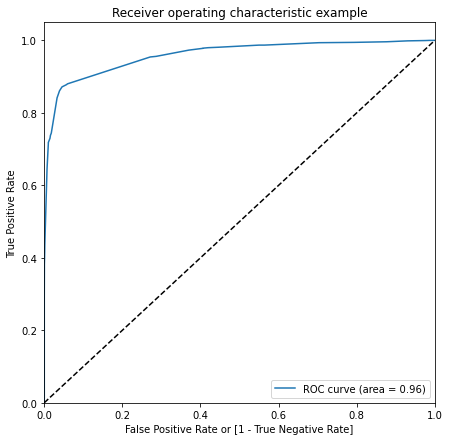

In [156]:
plt_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

We have got a value of 0.96. ROC curve should be a value closer to 1 for a good model. so our value is good

#### 7. Finding Optimal Cut-Off

In [157]:
# Create columns with different probability cutoffs 
nums = [float(x)/10 for x in range(10)]
for i in nums:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
9196,1,0.095568,9196,0,1,0,0,0,0,0,0,0,0,0
4696,0,0.052130,4696,0,1,0,0,0,0,0,0,0,0,0
3274,0,0.744345,3274,1,1,1,1,1,1,1,1,1,0,0
2164,0,0.004352,2164,0,1,0,0,0,0,0,0,0,0,0
1667,1,0.960961,1667,1,1,1,1,1,1,1,1,1,1,1


In [158]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cut_off_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    cut_off_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cut_off_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.760491  0.973166  0.629830
0.2   0.2  0.917504  0.880084  0.940495
0.3   0.3  0.922930  0.871698  0.954405
0.4   0.4  0.922770  0.860797  0.960845
0.5   0.5  0.922770  0.860797  0.960845
0.6   0.6  0.922770  0.860797  0.960845
0.7   0.7  0.918781  0.839832  0.967285
0.8   0.8  0.890378  0.737945  0.984029
0.9   0.9  0.885910  0.717400  0.989438


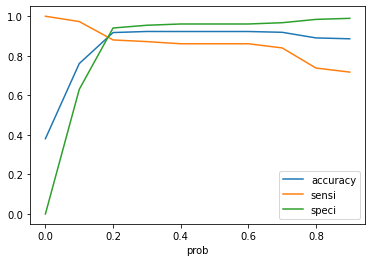

In [159]:
# Plot accuracy sensitivity and specificity for various probabilities.
cut_off_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the above line plots we got the value 0.2 which seems to be the most ideal cut-off point.

In [160]:
# Keeping 0.2 as cut-off point for predicting lead conversion
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

In [161]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
9196,1,0.095568,9196,0,1,0,0,0,0,0,0,0,0,0,0
4696,0,0.052130,4696,0,1,0,0,0,0,0,0,0,0,0,0
3274,0,0.744345,3274,1,1,1,1,1,1,1,1,1,0,0,1
2164,0,0.004352,2164,0,1,0,0,0,0,0,0,0,0,0,0
1667,1,0.960961,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [162]:
# Calculate the lead score for each lead
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
9196,1,0.095568,9196,0,10
4696,0,0.052130,4696,0,5
3274,0,0.744345,3274,1,74
2164,0,0.004352,2164,0,0
1667,1,0.960961,1667,1,96


In [163]:
# Calculating overall accuracy using optimal cut-off
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9175043880644647

In [164]:
# Creating confusion matrix for new cut-off 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )

In [165]:
confusion2

array([[3651,  231],
       [ 286, 2099]], dtype=int64)

In [166]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

print("True Positive", TP)
print("True Negative", TN)
print("False Positive", FP)
print("False Negative", FN)

True Positive 2099
True Negative 3651
False Positive 231
False Negative 286


In [167]:
# Specificity
TN / float(TN+FP)

0.9404945904173106

In [168]:
# Sensitivity
TP / float(TP+FN)

0.880083857442348

In [169]:
# Positive Predictive Value 
print (TP / float(TP+FP))

0.9008583690987124


In [170]:
# Negative Predictive Value
print (TN / float(TN+ FN))

0.9273558547117094


In [171]:
# False Postive Rate
print(FP/ float(TN+FP))

0.059505409582689336


In [172]:
# Precision
TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9310657596371882

In [173]:
# Recall
TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8607966457023061

In [174]:
# Calculate precision and recall values
from sklearn.metrics import precision_score, recall_score

In [175]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.9008583690987124

In [176]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.880083857442348

In [177]:
from sklearn.metrics import precision_recall_curve

In [178]:
# Plot Recall & Precision Curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

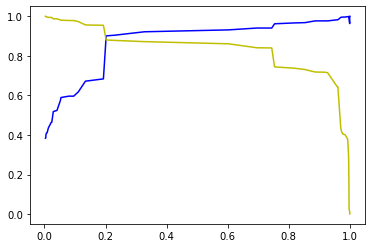

In [179]:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "y-")
plt.show()

#### 8. Conclusion On Training Dataset

=> The model seems to be performing very well. ROC curve has a value of 0.96 which is good.

=> Statistics of the model:

     . Accuracy:    91.75%
     . Sensitivity: 88%
     . Specificity: 94.04%

## Step 6 : Predictions On Test Dataset by Model Built From Training Dataset

#### 1. Rescaling the Test Dataset Values

In [180]:
# Extract the numerical columns and assigning them to a variable
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

# Scaling the test dataset values
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

In [181]:
# Displaying dataframe
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Tags_Lost to EINS,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7681,0.575687,-0.311318,0.092860,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
984,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8135,-0.423857,0.812462,-0.170849,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
6915,0.242505,-0.628665,-0.170849,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2712,-0.090676,-0.421456,0.356568,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


In [182]:
# Choosing the columns in test dataset which were chosen by RFE for building our model
X_test = X_test[rfe_col]
X_test.head()

,Lead Source_Direct Traffic,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
7681,1,0,0,0,0,0,0,0,1,0,1
984,0,0,0,0,0,0,0,0,0,0,0
8135,1,0,0,0,0,0,0,1,0,0,1
6915,0,0,0,0,0,0,0,0,1,0,0
2712,0,0,0,0,0,0,0,0,0,1,0


#### 2. Predicting the Test Data Values

In [183]:
# Adding constant 
X_test_sm = sm.add_constant(X_test)

In [184]:
# Predicting values in test dataset based on model built on training dataset
y_test_pred = res5.predict(X_test_sm)

In [185]:
y_test_pred[:10]

7681    0.052130
984     0.023873
8135    0.602445
6915    0.008604
2712    0.960961
244     0.008604
4698    0.023873
8287    0.040986
6791    0.960961
8970    0.023873
dtype: float64

In [186]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [187]:
y_pred_1.head()

,0
7681,0.052130
984,0.023873
8135,0.602445
6915,0.008604
2712,0.960961


In [188]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [189]:
# Create new column 'Prospect ID' using the index values
y_test_df['Prospect ID'] = y_test_df.index

In [190]:
# Remove index from both datasets to append them by column
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [191]:
# Appending y_pred_1 & y_test_df 
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [192]:
# Check dataframe
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.052130
1,0,984,0.023873
2,0,8135,0.602445
3,0,6915,0.008604
4,1,2712,0.960961


In [193]:
# Renaming column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [194]:
# Assign probabability score based on cutoff of 0.2
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

In [195]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_Predicted
0,0,7681,0.052130,0
1,0,984,0.023873,0
2,0,8135,0.602445,1
3,0,6915,0.008604,0
4,1,2712,0.960961,1


In [196]:
# Checking overall accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9214445271779598

#### 3. Confusion Matrix

In [197]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )

In [198]:
confusion2

array([[1582,   94],
       [ 117,  893]], dtype=int64)

In [199]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

print("True Positive", TP)
print("True Negative", TN)
print("False Positive", FP)
print("False Negative", FN)

True Positive 893
True Negative 1582
False Positive 94
False Negative 117


In [200]:
# Specificity
TN / float(TN+FP)

0.9439140811455847

In [201]:
# Sensitivity
TP / float(TP+FN)

0.8841584158415842

In [202]:
# Precision
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.9047619047619048

In [203]:
# Recall
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8841584158415842

#### 4. Conclusion On Test Dataset

=> After running the trained model on the test dataset, we got below values :-
    
     . Accuracy:    92.14%
     . Sensitivity: 88.40%
     . Specificity: 94.39%

## Step 7 : Final Observation

### Comparing the values obtained by our Train and Test dataset:

1. Train Dataset
     - Accuracy:    91.75%
     - Sensitivity: 88%
     - Specificity: 94.04%
     
     
2. Test Dataset
     - Accuracy:    92.14%
     - Sensitivity: 88.40%
     - Specificity: 94.39%

Based on the above performance parameters, our model looks good enough to give decision makers a fair understanding about making the right business calls.